In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기 및 분포 확인

In [ ]:
#@title 데이터 불러오기
train_url = 'https://raw.githubusercontent.com/Ruinenhaft/Project_space_titanic/main/data/train.csv'
test_url = 'https://raw.githubusercontent.com/Ruinenhaft/Project_space_titanic/main/data/test.csv'
sample_submission_url = 'https://raw.githubusercontent.com/Ruinenhaft/Project_space_titanic/main/data/sample_submission.csv'
train_raw = pd.read_csv(train_url)
test_raw = pd.read_csv(test_url)
sample_submission = pd.read_csv(sample_submission_url)
train_raw.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


- PassengerId  
승객 고유 ID. gggg-pp 형태로 gggg는 그룹, pp는 그룹 내 번호. 그룹이 같으면 가족인 경우가 많음
- HomePlanet  고향 행성
- CryoSleep  
냉동수면 상태 여부. 냉동수면 상태인 탑승객은 객실에 갇혀있음
- Cabin  
객실 번호. deck/num/side 형태로 side는 P(Port) 혹은 S(Starboard)
- Destination  
목적 행성
- Age  
나이
- VIP  
VIP 서비스 신청했는지 여부
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck  
우주선 내 있는 해당 편의시설에 지불한 금액
- Name  
이름과 성
- Transported  
다른 차원으로 전이됐는지 여부. target

In [ ]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train_raw.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train_raw.describe(include='O')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [ ]:
train_raw.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

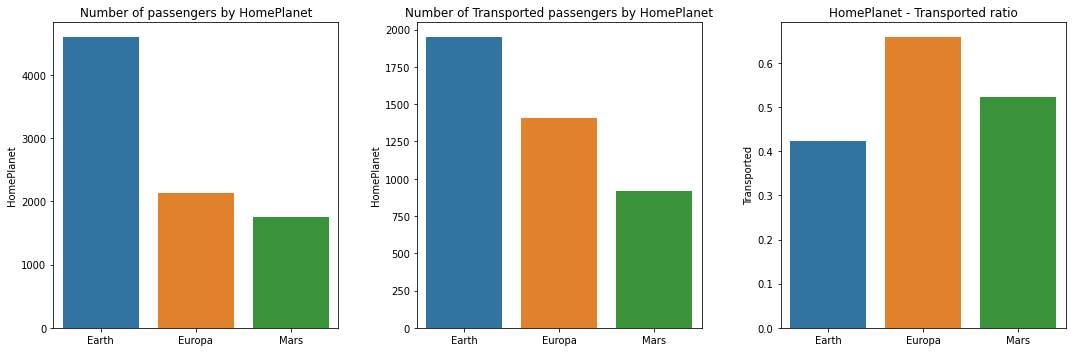

In [ ]:
#@title 데이터 분포 확인
# HomePlanet
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Number of passengers by HomePlanet')
value_counts = train_raw.HomePlanet.value_counts()
sns.barplot(x= value_counts.index, y =value_counts)
plt.subplot(1, 3, 2)
plt.title('Number of Transported passengers by HomePlanet')
value_counts1 = train_raw['HomePlanet'][(train_raw['Transported']== True)].value_counts()
sns.barplot(x= value_counts.index, y =value_counts1)
plt.subplot(1, 3, 3)
plt.title('HomePlanet - Transported ratio')
value_counts2 = train_raw.groupby(['HomePlanet'])['Transported'].mean()
sns.barplot(x= value_counts.index, y =value_counts2)
plt.tight_layout()
plt.show()

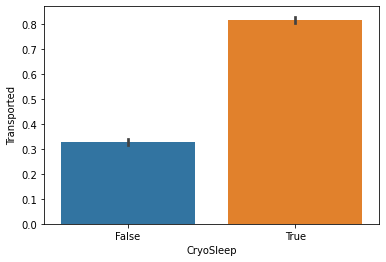

In [ ]:
# CryoSleep
sns.barplot(y='Transported', x='CryoSleep', data=train_raw)
plt.show()

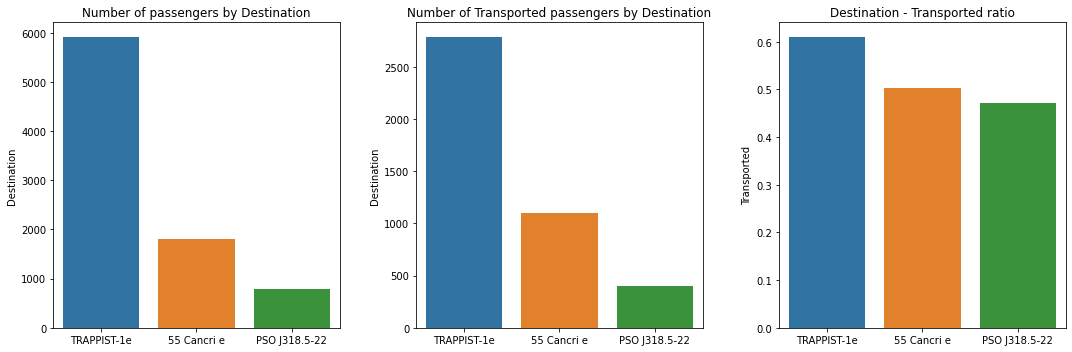

In [ ]:
# Destination
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Number of passengers by Destination')
value_counts = train_raw.Destination.value_counts()
sns.barplot(x= value_counts.index, y =value_counts)
plt.subplot(1, 3, 2)
plt.title('Number of Transported passengers by Destination')
value_counts1 = train_raw['Destination'][( train_raw['Transported']== True)].value_counts()
sns.barplot(x= value_counts.index, y =value_counts1)
plt.subplot(1, 3, 3)
plt.title('Destination - Transported ratio')
value_counts2 =  train_raw.groupby(['Destination'])['Transported'].mean()
sns.barplot(x= value_counts.index, y =value_counts2)
plt.tight_layout()
plt.show()

In [ ]:
# 편의시설 돈 쓴 여부
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck 컬럼 결측치에 0 입력
for feature in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] :
    train_raw[feature].fillna(0, inplace=True)
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck컬럼에 값이 있으면 1 없으면 0인 컬럼 Spend 생성
train_raw['Spend'] = [0 if train_raw.iloc[i][['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum() == 0 else 1 for i in range(len(train_raw))]

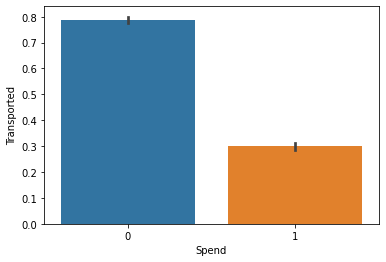

In [ ]:
sns.barplot(y='Transported', x='Spend', data=train_raw)
plt.show()

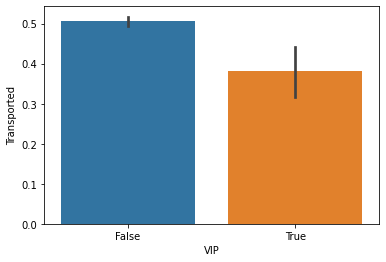

In [ ]:
sns.barplot(y='Transported', x='VIP', data=train_raw)
plt.show()

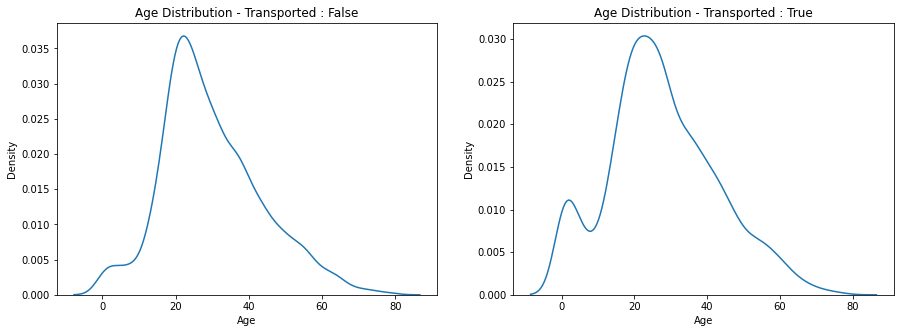

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Age Distribution - Transported : False')
sns.kdeplot(x="Age", data=train_raw[train_raw['Transported'] == False])
plt.subplot(1, 2, 2)
plt.title('Age Distribution - Transported : True')
sns.kdeplot(x='Age', data=train_raw[train_raw['Transported'] == True])
plt.show()

# 연령대는 0세부터 79세까지 분포하기 때문에 10대, 20대와 같이 범위를 나누었습니다.
# 0~19세까지는 도착률이 더 높고, 20~39세는 도착률이 더 낮으며 40세 이후로는 도착률이 거의 동일한 것을 확인할 수 있습니다.

# 전처리

In [ ]:
#@title 전처리용 함수 정의 
def pre_processing(data_raw) :
    data = data_raw.copy()

    # PassengerId 컬럼 Group, Group_num 컬럼으로 분리
    data[['Group', 'Group_num']] = data['PassengerId'].str.split("_", expand=True)
    
    # Name 컬럼 First, Last로 분리
    data[['First', 'Last']] = data['Name'].str.split(" ", expand=True)
    
    # HomePlanet, CryoSleep, Destination, VIP 컬럼 결측치에 최빈값 입력
    for feature in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP'] :
        data[feature].fillna(data[feature].mode()[0], inplace=True)
    
    # Age 결측치에 HomePlanet, CryoSleep, Destination, VIP 컬럼별 평균값 입력
    data['Age'] = data['Age'].fillna(data.groupby(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])['Age'].transform('mean'))
    
    # Group_num을 Group별 Group_num의 최대값으로 대체 (그룹 총 인원)
    data['Group_num'] = data.groupby('Group')['Group_num'].transform('max').apply(int)
    
    #Group별 Last가 같은 데이터의 개수를 값으로 갖는 Family_num 컬럼으로 생성 (그룹 내 가족 수)
    data['Family_num'] = data.groupby(['Group', 'Last'])['Last'].transform('count')
    # Family_num 결측치인 데이터는 대부분 혼자 온 사람들이므로 결측치에 1 대입
    data['Family_num'].fillna(1, inplace=True)
    data['Family_num'] = data['Family_num'].apply(int)
    
    # RoomService, FoodCourt, ShoppingMall, Spa, VRDeck 컬럼 결측치에 0 입력
    for feature in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] :
        data[feature].fillna(0, inplace=True)
    # RoomService, FoodCourt, ShoppingMall, Spa, VRDeck컬럼에 값이 있으면 1 없으면 0인 컬럼 Spend 생성
    data['Spend'] = [0 if data.iloc[i][['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum() == 0
                      else 1 for i in range(len(data))]
   
    # Cabin 컬럼은 deck, num, side로 분리해서 컬럼 생성
    data[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = data['Cabin'].str.split("/", expand=True)
    # Cabin_deck, Cabin_side 컬럼 결측치에 unknown 입력
    data[['Cabin_deck', 'Cabin_side']] = data[['Cabin_deck', 'Cabin_side']].fillna('unknown')
    # PassengerId, Cabin, Name, Group, First, Last, Cabin_num 컬럼 삭제
    data.drop(['PassengerId', 'Cabin', 'Name', 'Group', 'First', 'Last', 'Cabin_num'], axis=1, inplace=True)

    # Transported 변수 True = 1, False = 0 변환 (test 셋은 변환 X)
    if 'Transported' in data.columns:
        data['Transported'] = data['Transported'].apply(lambda x : 1 if x == True else 0)
    # 컬럼 순서 변경 (Transported 맨 앞으로)
    data = data[['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
                 'Spend', 'Group_num', 'Family_num', 'Cabin_deck', 'Cabin_side']]
    # 나머지 범주형 변수 원-핫 인코딩
    data = pd.get_dummies(data, columns=['HomePlanet', 'Destination', 'Cabin_deck', 'Cabin_side', 'CryoSleep', 'VIP'], drop_first=True)
    
    data.columns = data.columns.str.lower()

    return data

In [ ]:
clean1 = pre_processing(train_raw)
clean1.columns

Index(['transported', 'age', 'roomservice', 'foodcourt', 'shoppingmall', 'spa',
       'vrdeck', 'spend', 'group_num', 'family_num', 'homeplanet_europa',
       'homeplanet_mars', 'destination_pso j318.5-22',
       'destination_trappist-1e', 'cabin_deck_b', 'cabin_deck_c',
       'cabin_deck_d', 'cabin_deck_e', 'cabin_deck_f', 'cabin_deck_g',
       'cabin_deck_t', 'cabin_deck_unknown', 'cabin_side_s',
       'cabin_side_unknown', 'cryosleep_true', 'vip_true'],
      dtype='object')

# 모델 학습(Random Forest)

In [ ]:
#@title train/test/validation 셋 분리
from sklearn.model_selection import train_test_split

X = clean1.drop('transported', axis=1)
y = clean1['transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(6954, 25) (1739, 25)
(5563, 25) (1391, 25)


In [ ]:
#@title 성능 평가 지표 한 눈에 보기 위한 사용자 정의 함수
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

def eval_model(y_test, pred, model=None):
    # accuracy score 출력
    print(f"accuracy_score : {accuracy_score(y_test, pred):.6f}")
    # model 입력 했으면 roc auc score 출력
    if model :
        pred_proba = model.predict_proba(X_test)[:, 1]
        print(f"roc-auc score  : {roc_auc_score(y_test, pred_proba):.6f}")
    else :
        print("roc-auc score  : need model")
    print()
    # confusion matrix 출력
    print("-- confusion matrix --")
    cf_matrix = confusion_matrix(y_test, pred)
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    print()
    # 1종, 2종 오류 확률 출력
    print(f"type I error probabilty  : {cf_matrix[0][1]/(cf_matrix[0][1]+cf_matrix[1][1]):.6f}")
    print(f"type II error probabilty : {cf_matrix[1][0]/(cf_matrix[1][0]+cf_matrix[0][0]):.6f}")
    print()
    print()
    # 정밀도, 재현율 F1-score 등 출력
    print("-- classification report --")
    print(classification_report(y_test, pred))

In [ ]:
#@title 기본 전처리 후 학습
from sklearn.ensemble import RandomForestClassifier

rfc_model1 = RandomForestClassifier(random_state = 100, max_depth = 10, n_estimators = 10)
rfc_model1.fit(X_train, y_train)
rfc_pred1 = rfc_model1.predict(X_test)

accuracy_score : 0.797010
roc-auc score  : 0.879928

-- confusion matrix --


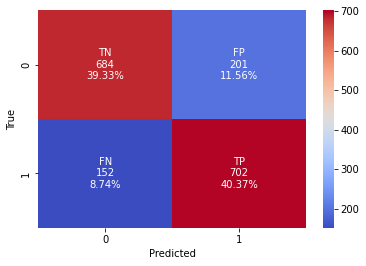


type I error probabilty  : 0.222591
type II error probabilty : 0.181818


-- classification report --
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       885
           1       0.78      0.82      0.80       854

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [ ]:
# Random Forest 최초 모델 accuracy 79.7%
eval_model(y_test, rfc_pred1, rfc_model1)

In [ ]:
# 과적합 있음
accuracy_score(y_train, rfc_model1.predict(X_train))

0.8474259419039402

In [ ]:
#@title Grid Search
from sklearn.model_selection import GridSearchCV
# 시간 측정
import time
start = time.time()

rfc = RandomForestClassifier(n_estimators=100, random_state=100, n_jobs=-1)

param_grid = {'n_estimators': range(1, 20),
              'max_depth': [8,16,24], 
              'min_samples_leaf' : [1, 6, 12],
              'min_samples_split' : [2, 8, 16]}

rfc_grid = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1)

rfc_grid.fit(X_train, y_train)

# 그리드 서치 학습 결과 출력
print('베스트 하이퍼 파라미터: {0}'.format(rfc_grid.best_params_))
print('베스트 하이퍼 파라미터 일 때 정확도: {0:.4f}'.format(rfc_grid.best_score_))

print("time :", time.time() - start)

베스트 하이퍼 파라미터: {'max_depth': 16, 'min_samples_leaf': 12, 'min_samples_split': 2, 'n_estimators': 18}
베스트 하이퍼 파라미터 일 때 정확도: 0.7955
time : 298.4257559776306


In [ ]:
# 최적화 모델 추출
rfc_model2 = rfc_grid.best_estimator_

rfc_pred2 = rfc_model2.predict(X_test)

accuracy_score : 0.797010
roc-auc score  : 0.888550

-- confusion matrix --


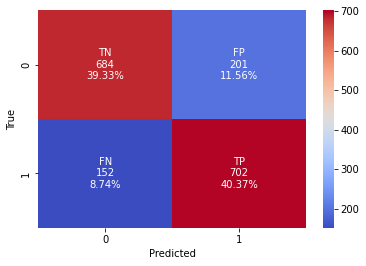


type I error probabilty  : 0.222591
type II error probabilty : 0.181818


-- classification report --
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       885
           1       0.78      0.82      0.80       854

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [ ]:
eval_model(y_test, rfc_pred2, rfc_model2)

In [ ]:
accuracy_score(y_train, rfc_model2.predict(X_train))

0.8262870290480299

In [ ]:
#@title tree 기반 모델에서 feature의 중요도 확인
!pip install eli5

In [ ]:
# Permutation Feature Importance 사용
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rfc_model1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=25)

Weight,Feature
0.0989 ± 0.0200,cryosleep_true
0.0385 ± 0.0080,foodcourt
0.0192 ± 0.0147,spend
0.0158 ± 0.0067,spa
0.0137 ± 0.0053,vrdeck
0.0118 ± 0.0035,roomservice
0.0094 ± 0.0071,shoppingmall
0.0053 ± 0.0040,cabin_deck_f
0.0041 ± 0.0025,cabin_deck_e
0.0037 ± 0.0045,homeplanet_mars


In [ ]:
clean2 = clean1.drop(['age', 'cabin_side_s', 'cabin_deck_c', 'cabin_side_unknown', 'cabin_deck_b', 'cabin_deck_unknown',
                      'cabin_deck_d', 'cabin_deck_t', 'destination_trappist-1e', 'homeplanet_europa', 'cabin_deck_g',
                      'vip_true', 'group_num', 'family_num'], axis=1)
clean2.columns

Index(['transported', 'roomservice', 'foodcourt', 'shoppingmall', 'spa',
       'vrdeck', 'spend', 'homeplanet_mars', 'destination_pso j318.5-22',
       'cabin_deck_e', 'cabin_deck_f', 'cryosleep_true'],
      dtype='object')

In [ ]:
X2 = clean2.drop('transported', axis=1)
y2 = clean2['transported']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=100)
X_tr2, X_val2, y_tr2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.2, random_state=100)

print(X_train2.shape, X_test2.shape)
print(X_tr2.shape, X_val2.shape)

(6954, 11) (1739, 11)
(5563, 11) (1391, 11)


In [ ]:
#@title HyperOpt
from hyperopt import hp

In [ ]:
# 검색 공간 설정
rfc_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),                    # 5부터 15까지 간격 1
                    'min_samples_leaf': hp.quniform ('min_samples_leaf', 1, 4, 1),      # 1부터 4까지 간격 1
                    'min_samples_split' : hp.quniform ('min_samples_split', 2, 4, 1),   # 2부터 4까지 간격 1
                    'n_estimators' : hp.quniform('n_estimators', 10, 100, 10)}          # 10부터 100까지 간격 10

In [ ]:
# 목적함수(=손실함수) 정의
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK

def objective_func(search_space):
    rfc_hp = RandomForestClassifier(max_depth = int(search_space['max_depth']),
                                    min_samples_leaf = int(search_space['min_samples_leaf']),
                                    min_samples_split = int(search_space['min_samples_split']))

    
    accuracy = cross_val_score(rfc_hp, X_train2, y_train2, scoring='accuracy', cv = 5)

    # accuracy는 높을수록 좋기 때문에 -1을 곱해줌
    return {'loss': -1 * np.mean(accuracy), 'status': STATUS_OK }

In [ ]:
from hyperopt import fmin, tpe, Trials
# 반복 결과를 저장할 변수 생성
trial_val = Trials()

# 50회 반복
best = fmin(fn = objective_func,
            space = rfc_search_space,
            algo = tpe.suggest,     # 최적화에 적용할 알고리즘 기본값
            max_evals = 50,
            trials = trial_val)

print('best :', best)

100%|██████████| 50/50 [02:14<00:00,  2.69s/it, best loss: -0.7956580070235688]
best : {'max_depth': 15.0, 'min_samples_leaf': 4.0, 'min_samples_split': 3.0, 'n_estimators': 60.0}


In [ ]:
# 구한 하이퍼파라미터를 모델에 넣어 다시 학습
rfc_model3 = RandomForestClassifier(max_depth = 15,
                                    min_samples_leaf = 4,
                                    min_samples_split = 3,
                                    n_estimators = 60, random_state=100)
rfc_model3.fit(X_train2, y_train2)
rfc_pred3 = rfc_model3.predict(X_test2)

In [ ]:
accuracy_score(y_test2, rfc_pred3)

0.8027602070155262

In [ ]:
roc_auc_score(y_test2, rfc_pred3)

0.8035280964289021

In [ ]:
accuracy_score(y_train2, rfc_model3.predict(X_train2))

0.8376473971814783

# 모델 학습(LGBM)

In [ ]:
#@title 기본 전처리 후 학습 (조기 중단)
from lightgbm import LGBMClassifier

lgbm_model1 = LGBMClassifier(n_estimators=500, learning_rate=0.01, random_state=100)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_model1.fit(X_tr, y_tr, eval_set=evals, eval_metric='logloss', early_stopping_rounds=200, verbose=False)

lgbm_pred1 = lgbm_model1.predict(X_test)

accuracy_score : 0.808511
roc-auc score  : 0.892782

-- confusion matrix --


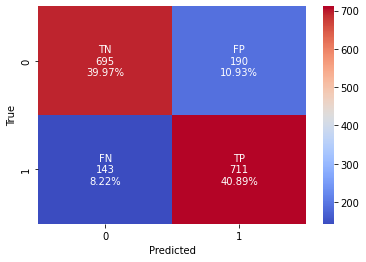


type I error probabilty  : 0.210877
type II error probabilty : 0.170644


-- classification report --
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       885
           1       0.79      0.83      0.81       854

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [ ]:
# 최초 모델 accuracy : 80.8%
eval_model(y_test, lgbm_pred1, lgbm_model1)

In [ ]:
# 과적합 약간
accuracy_score(y_train, lgbm_model1.predict(X_train))

0.8441184929536957

In [ ]:
#@title Random Grid Search
from sklearn.model_selection import RandomizedSearchCV
# 시간 측정
import time
start = time.time()

lgbmc = LGBMClassifier(random_state=100)

param_grid = {'num_leaves':[20,40,60,80,100],
              'min_child_samples':[5,10,15],
              'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],
              'reg_alpha':[0,0.01,0.03]}

lgbm_grid = RandomizedSearchCV(lgbmc, param_grid, scoring='accuracy', n_iter=100)

lgbm_grid.fit(X_train, y_train)

print('베스트 하이퍼 파라미터: {0}'.format(lgbm_grid.best_params_))
print('베스트 하이퍼 파라미터 일 때 정확도: {0:.4f}'.format(lgbm_grid.best_score_))

print("time :", time.time() - start)

베스트 하이퍼 파라미터: {'reg_alpha': 0.01, 'num_leaves': 60, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.05}
베스트 하이퍼 파라미터 일 때 정확도: 0.8036
time : 148.14161038398743


In [ ]:
# 최적화 모델 추출
lgbm_model2 = lgbm_grid.best_estimator_

lgbm_pred2 = lgbm_model2.predict(X_test)

accuracy_score : 0.805060
roc-auc score  : 0.893459

-- confusion matrix --


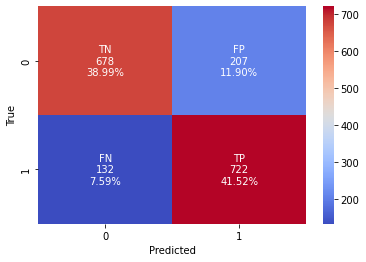


type I error probabilty  : 0.222820
type II error probabilty : 0.162963


-- classification report --
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       885
           1       0.78      0.85      0.81       854

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.80      1739
weighted avg       0.81      0.81      0.80      1739



In [ ]:
eval_model(y_test, lgbm_pred2, lgbm_model2)

In [ ]:
accuracy_score(y_train, lgbm_model2.predict(X_train))

0.8308886971527178

In [ ]:
#@title HyperOpt
# 검색 공간 설정
lgbm_search_space = {'n_estimators' : hp.quniform('n_estimators', 100, 1000, 100),          # 100부터 1000까지 간격 100
                     'max_depth' : hp.quniform('max_depth', 5, 15, 1),                      # 5부터 15까지 간격 1
                     'num_leaves' : hp.quniform('num_leaves', 5, 15, 1),                    # 5부터 15까지 간격 1
                     'min_child_samples' : hp.quniform('min_child_samples', 10, 30, 2),     # 1부터 1까지 간격 1
                     'learning_rate' : hp.uniform('learning_rate', 0.01, 0.1),              # 0.01부터 0.1까지 균등분포
                     'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1)}           # 0.5부터 1까지 균등분포

In [ ]:
# 목적함수 정의
def objective_func(search_space) :  # 정수형 파라미터는 정수형으로 입력
  lgbm_hp = LGBMClassifier(n_estimators=int(search_space['n_estimators']),
                           max_depth=int(search_space['max_depth']),    
                           num_leaves=int(search_space['num_leaves']),
                           min_child_samples=int(search_space['min_child_samples']),
                           learning_rate = search_space['learning_rate'],
                           colsample_bytree = search_space['colsample_bytree'],
                           eval_metric='logloss')
  
  # cross_val_score로 교차검증의 accuracy 점수 계산
  accuracy = cross_val_score(lgbm_hp, X_train2, y_train2, scoring='accuracy', cv=5)
  
  # accuracy는 높을수록 좋기 때문에 교차검증의 평균 accuracy에 -1 곱해줌
  return {'loss':-1 * np.mean(accuracy), 'status':STATUS_OK}

In [ ]:
trial_val = Trials()

# 50회 반복
best = fmin(fn = objective_func,
            space = lgbm_search_space,
            algo = tpe.suggest,     
            max_evals = 50,
            trials=trial_val)

print('best :', best)

100%|██████████| 50/50 [01:42<00:00,  2.04s/it, best loss: -0.7966654081479604]
best : {'colsample_bytree': 0.655941889273133, 'learning_rate': 0.031449660399699556, 'max_depth': 13.0, 'min_child_samples': 16.0, 'n_estimators': 400.0, 'num_leaves': 7.0}


In [ ]:
lgbm_model3 = LGBMClassifier(colsample_bytree = 0.6559,
                             learning_rate = 0.0314,
                             max_depth = 13, 
                             min_child_samples = 16,
                             n_estimators = 400,
                             num_leaves = 7, random_state = 100)

evals = [(X_tr2, y_tr2), (X_val2, y_val2)]
lgbm_model3.fit(X_tr2, y_tr2, eval_set=evals, eval_metric='logloss', early_stopping_rounds=200, verbose=False)

lgbm_pred3 = lgbm_model3.predict(X_test2)

In [ ]:
accuracy_score(y_test2, lgbm_pred3)

0.7993099482461185

In [ ]:
roc_auc_score(y_test2, lgbm_pred3)

0.8003843660276002

In [ ]:
accuracy_score(y_train2, lgbm_model3.predict(X_train2))

0.8114754098360656

# 모델 학습(XGBoost)

In [ ]:
#@title 기본 전처리 후 학습
from xgboost import XGBClassifier

xgb_model1 = XGBClassifier(n_estimators=500, max_depth=5, random_state=100)

xgb_model1.fit(X_train, y_train)
xgb_pred1 = xgb_model1.predict(X_test)

accuracy_score : 0.791834
roc-auc score  : 0.880005

-- confusion matrix --


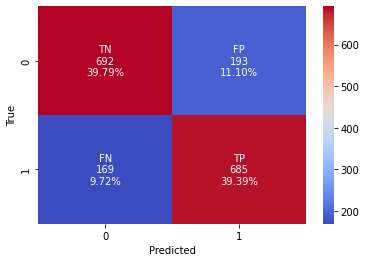


type I error probabilty  : 0.219818
type II error probabilty : 0.196283


-- classification report --
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       885
           1       0.78      0.80      0.79       854

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [ ]:
eval_model(y_test, xgb_pred1, xgb_model1)

In [ ]:
accuracy_score(y_train, xgb_model1.predict(X_train))

0.903940178314639

In [ ]:
#@title Grid Search

param_xgb = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3], # 경사하강법 : '매개변수' -> 최소오차 -> 보폭 크기
    'max_depth': [3], # 트리의 깊이 (오버피팅 방지)
    'subsample': [0.3, 0.5, 0.7, 1], # 추출할 데이터 비율
    'n_estimators': [300, 600, 1000] # 트리 개수
    }

In [ ]:
# 시간 측정
import time
start = time.time()

xgbc = XGBClassifier(random_state=100)
xgb_grid = GridSearchCV(xgbc, param_xgb, n_jobs=-1, scoring='f1', cv = 5)
xgb_grid.fit(X_train, y_train)

print('베스트 하이퍼 파라미터: {0}'.format(xgb_grid.best_params_))
print('베스트 하이퍼 파라미터 일 때 정확도: {0:.4f}'.format(xgb_grid.best_score_))

print("time :", time.time() - start)

베스트 하이퍼 파라미터: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
베스트 하이퍼 파라미터 일 때 정확도: 0.8107
time : 700.8946421146393


In [ ]:
# 최적화 모델 추출
xgb_model2 = xgb_grid.best_estimator_

xgb_pred2 = xgb_model2.predict(X_test)

accuracy_score : 0.806786
roc-auc score  : 0.894362

-- confusion matrix --


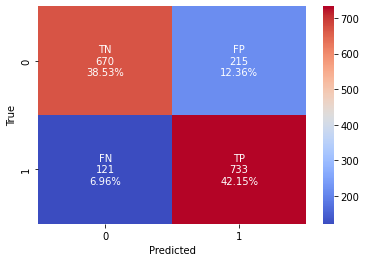


type I error probabilty  : 0.226793
type II error probabilty : 0.152971


-- classification report --
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       885
           1       0.77      0.86      0.81       854

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [ ]:
eval_model(y_test, xgb_pred2, xgb_model2)

In [ ]:
accuracy_score(y_train, xgb_model2.predict(X_train))

0.814495254529767

In [ ]:
#@title HyperOpt
# 검색 공간 설정
xgb_search_space = {'n_estimators' : hp.quniform('n_estimators', 500, 1000, 100),       # 500부터 1000까지 간격 100
                    'max_depth' : hp.quniform('max_depth', 5, 15, 1),                   # 5부터 20까지 간격 1
                    'learning_rate' : hp.uniform('learning_rate', 0.01, 0.05),          # 0.01부터 0.05까지 균등분포
                    'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1)}        # 0.5부터 1까지 균등분포

In [ ]:
# 목적함수 정의
def objective_func(search_space) :  # 정수형 파라미터는 정수형으로 입력
    xgb_hp = XGBClassifier(n_estimators=int(search_space['n_estimators']),
                           max_depth=int(search_space['max_depth']),    
                           learning_rate = search_space['learning_rate'],
                           colsample_bytree = search_space['colsample_bytree'],
                           eval_metric='logloss')
  
    # cross_val_score로 교차검증의 accuracy 점수 계산
    accuracy = cross_val_score(xgb_hp, X_train2, y_train2, scoring='accuracy', cv=5)
  
    # accuracy는 높을수록 좋기 때문에 교차검증의 평균 accuracy에 -1 곱해줌
    return {'loss':-1 * np.mean(accuracy), 'status':STATUS_OK}

In [ ]:
trial_val = Trials()

# 50회 반복
best = fmin(fn = objective_func,
            space = xgb_search_space,
            algo = tpe.suggest,     
            max_evals = 50,
            trials=trial_val)

print('best :', best)

100%|██████████| 50/50 [21:09<00:00, 25.40s/it, best loss: -0.7965209026165121]
best : {'colsample_bytree': 0.9374681301039542, 'learning_rate': 0.010446545389670013, 'max_depth': 6.0, 'n_estimators': 1000.0}


In [ ]:
xgb_model3 = XGBClassifier(colsample_bytree = 0.9375,
                           learning_rate = 0.01,
                           max_depth = 6,
                           n_estimators = 1000, random_state = 100)

xgb_model3.fit(X_train2, y_train2)
xgb_pred3 = xgb_model3.predict(X_test2)

In [ ]:
accuracy_score(y_test2, xgb_pred3)

0.7958596894767107

In [ ]:
roc_auc_score(y_test2, xgb_pred3)

0.7970355522036544

In [ ]:
accuracy_score(y_train2, xgb_model3.predict(X_train2))

0.8271498418176589

# 모델 성능 비교

In [ ]:
results = pd.DataFrame(np.array([[0.7979, 0.8790, 0.8474], [0.7979, 0.8885, 0.8262], [0.8027, 0.8035, 0.8376],
                        [0.8085, 0.8927, 0.8441], [0.8050, 0.8934, 0.8308], [0.7993, 0.8004, 0.8144],
                        [0.7918, 0.88, 0.9039], [0.8, 0.8067, 0.8943], [0.7958, 0.797, 0.8271]]), 
                       columns = ['Accuracy', 'ROC-AUC Score', 'train Accuracy'],
                       index = [['RF','RF','RF','LGBM','LGBM','LGBM','XGBoost','XGBoost','XGBoost'],
                                  ['최초','GS CV 조정','HO 조정','최초','GS CV 조정','HO 조정','최초','GS CV 조정','HO 조정']])
results

Accuracy  ROC-AUC Score  train Accuracy
RF      최초          0.7979         0.8790          0.8474
        GS CV 조정    0.7979         0.8885          0.8262
        HO 조정       0.8027         0.8035          0.8376
LGBM    최초          0.8085         0.8927          0.8441
        GS CV 조정    0.8050         0.8934          0.8308
        HO 조정       0.7993         0.8004          0.8144
XGBoost 최초          0.7918         0.8800          0.9039
        GS CV 조정    0.8000         0.8067          0.8943
        HO 조정       0.7958         0.7970          0.8271